# Different Approaches to Defining Neural Networks with Keras and TensorFlow

[TensorFlow](https://www.tensorflow.org/) 2.0 came with many new exciting updates. One of these updates was full integration with the very popular [Keras API](https://keras.io/) for developing deep learning models. Before TensorFlow 2.0, you had two install TensorfFlow and Keras separately. Now, Keras comes as a submodule of TensorFlow (*i.e.*, tensorflow.keras). We will be using Keras and TensorFlow on the majority of tutorials in this class. There are 3 ways to define Neural Networks with Keras. In this tutorial we will cover these different ways.

The learning goals of this tutorial are:
    - Introduce the Keras sequential API, functional API and model subclassing methods for defining neural networks;
    - Illustrate a simple classiifcation problem using the Iris dataset.


# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*


In [3]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  # Function for loading the Iris dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [5]:
# Load the dataset and return to the defined variable 
dataset = load_iris()

In [6]:
# Load iris data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [7]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train, Validation and Test Sets Split

In [10]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

In [12]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# 1. Change the min-max normalization above by standardization ((X - mean)/(std))
# 2. Don't normalize the data and see what happens
####################################################################################

## Representing Labels using one-hot-ecoding

In [14]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 1 1 2 0]

Y_oh_train[:5]=
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [15]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (75, 4)
Size of X_val :  (37, 4)
Size of X_test :  (38, 4)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [17]:
from tensorflow.keras.models import Sequential 
# Passing a list of layers to the constructor
model = Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,) , name = "layer1"),
    tf.keras.layers.Dense(10, activation='relu' , name = "layer2"),
    tf.keras.layers.Dense(3, activation='softmax', name = "layer3"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 25        
                                                                 
 layer2 (Dense)              (None, 10)                60        
                                                                 
 layer3 (Dense)              (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2. The Functional API

In [19]:
from tensorflow.keras.models import Model
# This returns a tensor
input_tensor = tf.keras.layers.Input(shape=(4,))
# A layer instance is callable on a tensor, and returns a tensor
x1 = tf.keras.layers.Dense(5, activation='relu')(input_tensor)
x2 = tf.keras.layers.Dense(10, activation='relu')(x1)
out_tensor = tf.keras.layers.Dense(3, activation='softmax')(x2)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=out_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## 3. Model Subclassing 

In [21]:
class MyNeuralNetwork(Model):
    def __init__(self, **kwargs):
        super(MyNeuralNetwork, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        out_tensor = self.dense3(x2)
        return out_tensor
model = MyNeuralNetwork()
model.build(input_shape = (None,4))
model.summary()

Model: "my_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  25        
                                                                 
 dense_4 (Dense)             multiple                  60        
                                                                 
 dense_5 (Dense)             multiple                  33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

In [23]:
model.compile(optimizer='Adadelta',loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# training the model 
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
1/2 [==============>...............] - ETA: 0s - loss: 1.0396 - accuracy: 0.5156

2024-10-04 12:24:22.100876: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 69ms/step - loss: 1.0391 - accuracy: 0.4933 - val_loss: 1.0311 - val_accuracy: 0.5405
Epoch 2/300
2/2 [==============================] - 0s 12ms/step - loss: 1.0391 - accuracy: 0.4933 - val_loss: 1.0311 - val_accuracy: 0.5405
Epoch 3/300
2/2 [==============================] - 0s 11ms/step - loss: 1.0391 - accuracy: 0.4933 - val_loss: 1.0311 - val_accuracy: 0.5405
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 1.0391 - accuracy: 0.4933 - val_loss: 1.0310 - val_accuracy: 0.5405
Epoch 5/300
2/2 [==============================] - 0s 12ms/step - loss: 1.0390 - accuracy: 0.4933 - val_loss: 1.0310 - val_accuracy: 0.5405
Epoch 6/300
2/2 [==============================] - 0s 13ms/step - loss: 1.0390 - accuracy: 0.4933 - val_loss: 1.0310 - val_accuracy: 0.5405
Epoch 7/300
2/2 [==============================] - 0s 12ms/step - loss: 1.0390 - accuracy: 0.4933 - val_loss: 1.0310 - val_accuracy: 0.5405
Epoch 8/300
2/2 [===============

Test loss (cross-entropy and accuracy): [1.0450637340545654, 0.3947368562221527]

Layer 0
Bias:
 [ 0.00038417 -0.0004446   0.0010017   0.00092305  0.        ]
W:
 [[ 0.65036964  0.5171321   0.6552802  -0.27014738 -0.60202664]
 [-0.6271356   0.7046318  -0.7045969   0.3272248  -0.5260226 ]
 [ 0.13009533 -0.5642297  -0.27194852 -0.45777377 -0.56667006]
 [ 0.35154584  0.11930664  0.6408992   0.10002913  0.28870833]]

Layer 1
Bias:
 [ 0.0000000e+00 -1.5148682e-04  7.0859342e-06  2.5572331e-04
  9.8344276e-04 -1.1147245e-04 -2.3426747e-04 -2.1149611e-04
 -1.0576710e-03  7.6490018e-04]
W:
 [[ 0.10120201 -0.05086017  0.14190294  0.02999794  0.5360917   0.07291649
   0.1764742   0.5657676  -0.00811951  0.06963842]
 [-0.3356978   0.5315415   0.20195216  0.22415695 -0.42818615  0.42363423
   0.22959664  0.49238998 -0.35012197 -0.40815318]
 [-0.3358406   0.13445635 -0.25643906  0.222414   -0.09934492  0.47300005
  -0.26623142 -0.44671404  0.32579064  0.2844107 ]
 [ 0.0232594   0.13864286  0.378994

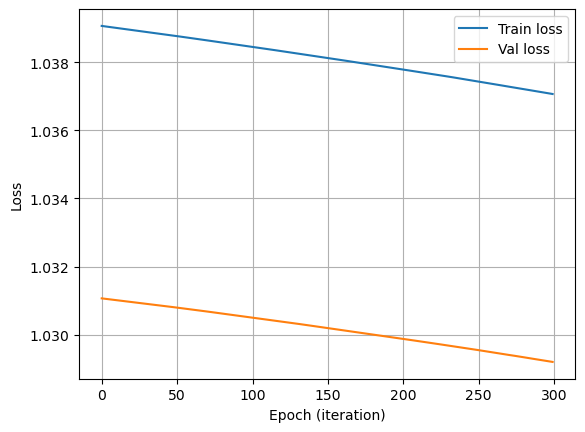

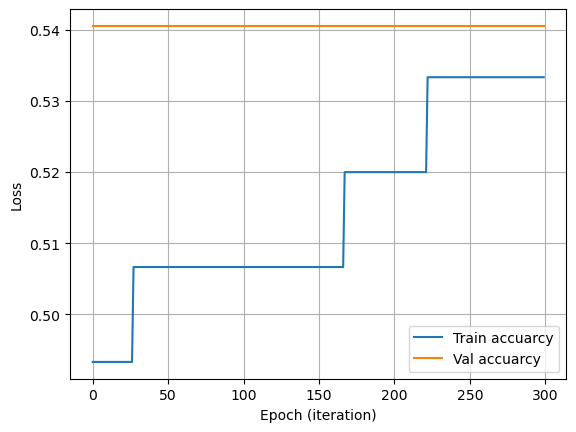

In [25]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3